In [1]:
# import jax.numpy as jnp
import numpy as np
import glob
import os 
import re
import matplotlib.pyplot as plt
import astropy.units as u
import astropy
import os

import hmc_flare
import read_output
import load_data
import lc_operation
import hmc_flare_fourth_order
import importlib 
import plotter
importlib.reload(hmc_flare)
#importlib.reload(hmc_flare)



path_to_mdwarf_lc_folder = './data/'
file_csv ="flare_can.csv"
dates, gaia_ids, tic_ids, t_half, t_rise, t_peak, mass, rad, teff, Leff, tplotmin, tplotMax, plot_flux_type = load_data.load_flare_csv(file_csv)



In [7]:
hmc_flare_fourth_order.__file__

'/Users/masatakaaizawa/research/codes/flare_fitting/hmc_flare_fourth_order.py'

In [ ]:
## HMC fitting for flares

In [24]:
importlib.reload(hmc_flare_fourth_order)


folder_for_fig = "./mcmc_fig_fourth"
folder_for_mcmc_result = "./mcmc_result_fourth"


if not os.path.exists(folder_for_fig):
    os.makedirs(folder_for_fig)

if not os.path.exists(folder_for_mcmc_result):
    os.makedirs(folder_for_mcmc_result)

para_sum = []
para_sum_20 = []
para_names = ["t_rise","t_peak", "f_peak", "t_1_2_decay", 't_ratio', 't_1_2_decay_2', "fraction"]
para_names_poly = ["t_rise","t_peak", "f_peak", "t_1_2_decay", 't_ratio', 't_1_2_decay_2', "fraction", "a", "b", "c"]
para_names_poly_const = ["t_rise","t_peak", "f_peak", "t_1_2_decay", 't_ratio', 't_1_2_decay_2', "fraction", "a", "t_peak_duration"]


try_20 = False
num_poly = 4
num_warmup, num_samples = 10000, 10000
gaia_id_analyze = 3424781736143842432
for i in range(len(gaia_ids)):
    
    if gaia_ids[i] == gaia_id_analyze:

        time, flux, flux_err = lc_operation.load_lc_data(path_to_mdwarf_lc_folder, gaia_ids[i], dates[i], plot_flux_type[i], tplotmin[i], tplotMax[i], t_rise[i], t_peak[i])
        time = time.astype(np.float64)
        flux = np.array(flux.astype(np.float64))
        flux_err = np.array(flux_err.astype(np.float64))


        # Run NUTS.
        out_file_head = os.path.join(folder_for_fig, str(gaia_ids[i]))
        out_mcmcfile_head = os.path.join(folder_for_mcmc_result, str(gaia_ids[i]))+"_mcmc_results"

        ### Model with linear regression for rising phase
        mean_muy, hpdi_muy, para_arr, mcmc_samples = hmc_flare.run_hmc_flare(time, flux, flux_err,para_names,  num_warmup, num_samples, out_file_head)

        ### Model with 4th polynomial fitting for rising phase
        para_arr = np.array(para_arr)
        para_dic_for_init = hmc_flare.make_dir_for_init(para_names, np.array(para_arr)[:,1])
        para_dic_for_init = hmc_flare.init_for_poly_const(para_dic_for_init)
        para_dic_for_init = hmc_flare_fourth_order.make_para_dict_for_4th_order( para_dic_for_init, num_poly = num_poly )
        mean_muy_4th, hpdi_muy_4th, para_arr_4th, mcmc_samples_4th = hmc_flare_fourth_order.run_hmc_flare_4th(time, flux, flux_err, \
                                                                                              para_names_poly_const,  num_warmup, num_samples, out_file_head, \
                                                                                             value_dic = para_dic_for_init, dense_mass = True, num_poly = num_poly )
        np.savez(out_mcmcfile_head + "_4th_poly" , time = time, flux = flux, flux_err= flux_err, 
             mean_model = mean_muy_4th,low_model= hpdi_muy_4th[0], upper_model= hpdi_muy_4th[1], samples = mcmc_samples_4th)



  0%|          | 0/20000 [00:00<?, ?it/s]/opt/anaconda3/envs/test/lib/python3.8/site-packages/jax/_src/tree_util.py:185: FutureWarning: jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() instead as a drop-in replacement.
  warnings.warn('jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() '
sample: 100%|██████████| 20000/20000 [00:29<00:00, 679.47it/s, 31 steps of size 1.62e-01. acc. prob=0.88]



                   mean       std    median      5.0%     95.0%     n_eff     r_hat
       f_peak      0.13      0.00      0.13      0.12      0.14   4649.50      1.00
     fraction      0.79      0.03      0.79      0.74      0.84   4617.12      1.00
  t_1_2_decay     16.25      2.20     16.19     12.54     19.69   3266.81      1.00
       t_peak     -2.66      0.93     -2.76     -4.13     -1.13   2856.79      1.00
      t_ratio     10.21      1.41     10.07      7.88     12.44   3578.12      1.00
       t_rise      9.41      1.76      9.16      6.62     12.19   2907.21      1.00

Number of divergences: 0
[2718843009 1272950319]


  0%|          | 0/20000 [00:00<?, ?it/s]/opt/anaconda3/envs/test/lib/python3.8/site-packages/jax/_src/tree_util.py:185: FutureWarning: jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() instead as a drop-in replacement.
  warnings.warn('jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() '
sample: 100%|██████████| 20000/20000 [00:42<00:00, 466.51it/s, 36 steps of size 3.69e-02. acc. prob=0.72] 



                       mean       std    median      5.0%     95.0%     n_eff     r_hat
             a[0]      2.64      1.19      2.64      0.74      4.52     52.10      1.00
             a[1]      2.26      3.92      2.17     -4.09      8.41     95.08      1.00
             a[2]     -0.40      4.98     -0.30     -8.26      7.71    128.21      1.00
           f_peak      0.11      0.00      0.11      0.10      0.12    112.90      1.00
         fraction      0.75      0.04      0.75      0.69      0.81     73.02      1.00
      t_1_2_decay     13.96      2.11     13.85     10.45     17.41    156.45      1.00
           t_peak     -4.72      0.75     -4.83     -5.77     -3.38     55.15      1.00
  t_peak_duration      6.27      1.69      6.24      3.46      9.02    142.47      1.00
          t_ratio     11.57      1.70     11.54      8.72     14.17    156.04      1.00
           t_rise     12.82      3.46     13.11      4.86     17.36     52.54      1.00

Number of divergences: 9817


/opt/anaconda3/envs/test/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/pairplot.py:238: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


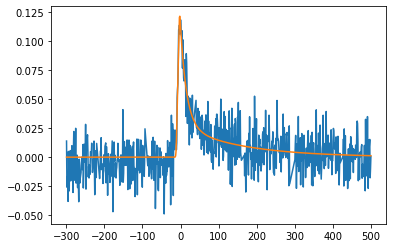

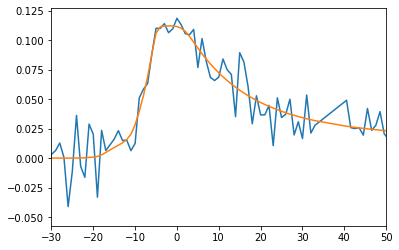

In [25]:
plt.plot(time, flux)
plt.plot(time, mean_muy)
plt.plot(time, mean_muy_4th)
plt.show()
plt.plot(time, flux)
plt.plot(time, mean_muy_4th)
plt.plot(time, mean_muy)
plt.xlim(-30,50)
plt.show()


In [26]:
mcmc_samples_4th 

{'a': DeviceArray([[ 0.26175883, -0.83857536,  0.13888717],
              [ 0.3284614 , -1.0316676 ,  0.5102587 ],
              [ 0.9472325 ,  2.2096741 ,  4.7395372 ],
              ...,
              [ 1.1081209 ,  0.6289077 , -0.33946037],
              [ 2.4645336 ,  4.7829914 ,  4.5045185 ],
              [ 2.3644118 ,  5.0028954 ,  7.03261   ]], dtype=float32),
 'd': DeviceArray([ 0.23922133,  0.8703877 ,  2.4770954 , ..., -0.86024714,
               1.1860609 ,  3.394127  ], dtype=float32),
 'f_peak': DeviceArray([0.1149167 , 0.11634551, 0.10712531, ..., 0.11367893,
              0.10712617, 0.11243632], dtype=float32),
 'fraction': DeviceArray([0.7601254 , 0.7741988 , 0.78534395, ..., 0.6798285 ,
              0.69432586, 0.76094943], dtype=float32),
 'mu': DeviceArray([[0.        , 0.        , 0.        , ..., 0.00178926,
               0.00177938, 0.00176956],
              [0.        , 0.        , 0.        , ..., 0.00195076,
               0.00194052, 0.00193034],
        